In [1]:
import lightkurve as lk
%matplotlib inline

In [2]:
tpf=lk.search_targetpixelfile('RZ Cep')
tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 17,2019,SPOC,120,455896112,0.0
1,TESS Sector 18,2019,SPOC,120,455896112,0.0
2,TESS Sector 24,2020,SPOC,120,455896112,0.0
3,TESS Sector 17,2019,TESS-SPOC,1800,455896112,0.0
4,TESS Sector 18,2019,TESS-SPOC,1800,455896112,0.0
5,TESS Sector 24,2020,TESS-SPOC,1800,455896112,0.0
6,TESS Sector 57,2022,TESS-SPOC,200,455896112,0.0
7,TESS Sector 58,2022,TESS-SPOC,200,455896112,0.0


In [3]:
tpf = tpf[7].download()

In [4]:
tpf.animate()

In [6]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

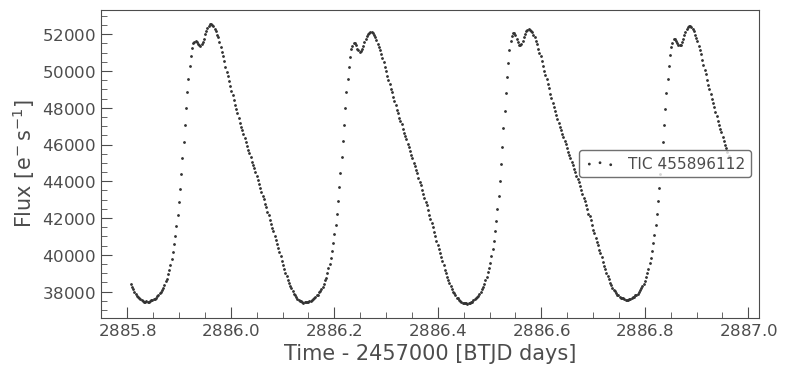

In [7]:
lcp=lc[1500:2000]
lcp.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

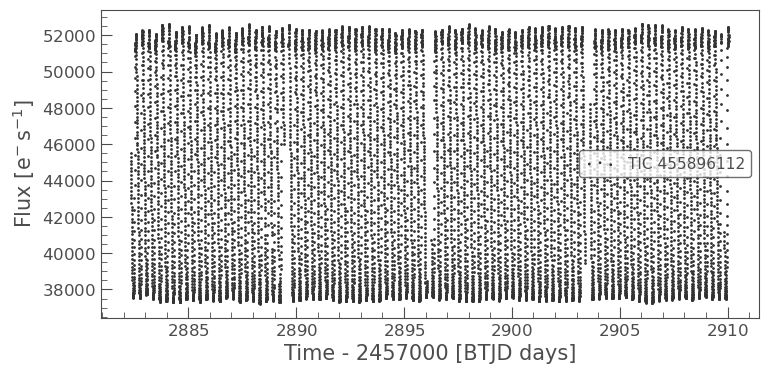

In [8]:
lc.scatter()

In [8]:
pg = lc.to_periodogram(method="ls",minimum_period=0.305,maximum_period=0.315,oversample_factor=100)

In [9]:
pg = lc.to_periodogram(method="ls",minimum_period=0.1,maximum_period=5,oversample_factor=100)

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

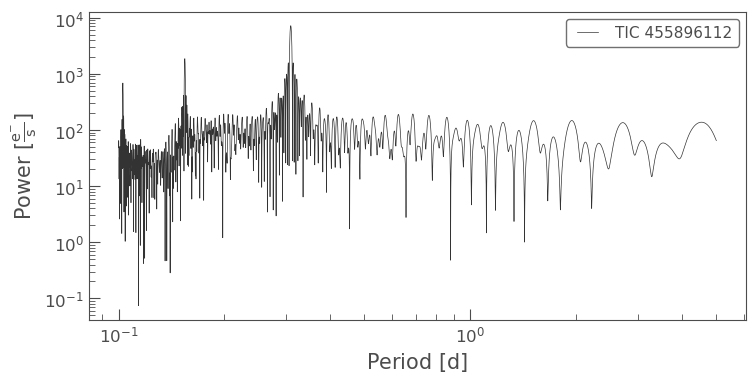

In [10]:
pg.plot(view="period",scale="log")

In [11]:
pg.period_at_max_power

<Quantity 0.30861797 d>

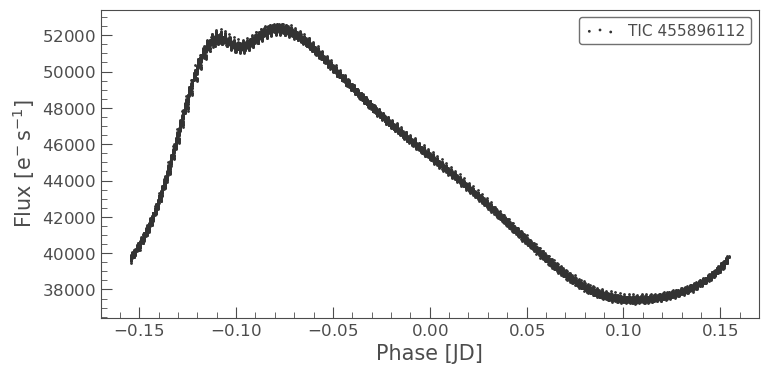

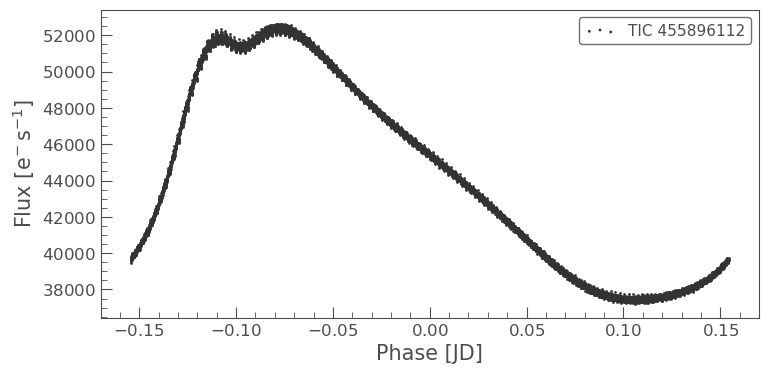

In [11]:
lc.fold(period=pg.period_at_max_power).scatter();
lc.fold(period=0.30862741).scatter();

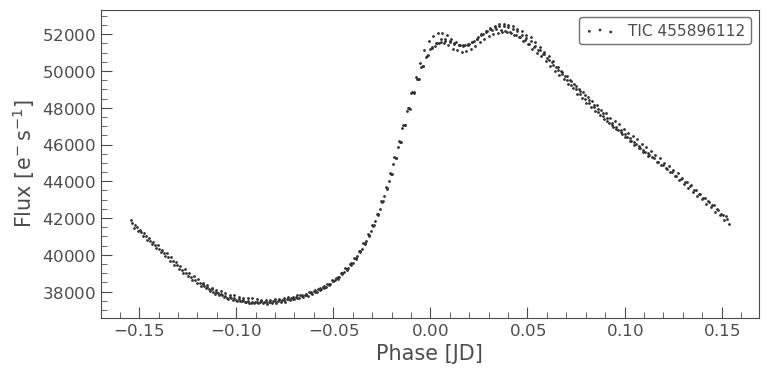

In [12]:
lcp.fold(period=0.30862741,epoch_phase=0.5).scatter();